# Data visualization
## Using Matplotlib

In [2]:
import pandas as pd
import numpy as np

forest_fires = pd.read_csv('forestfires.csv')
print forest_fires.head(5)

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Scatterplots

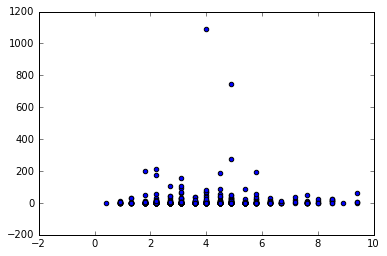

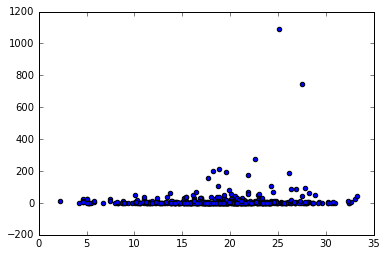

In [5]:
wind = forest_fires['wind']
area = forest_fires['area']
temp = forest_fires['temp']

plt.scatter(wind,area)
plt.show()
plt.scatter(temp,area)
plt.show()

### Line plots

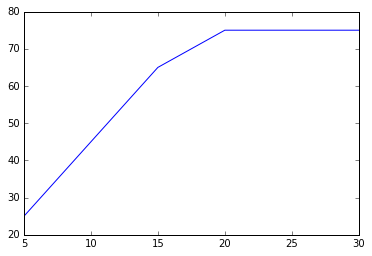

In [6]:
age = [5, 10, 15, 20, 25, 30]
height = [25, 45, 65, 75, 75, 75]

plt.plot(age,height)
plt.show()

### Bar graphs

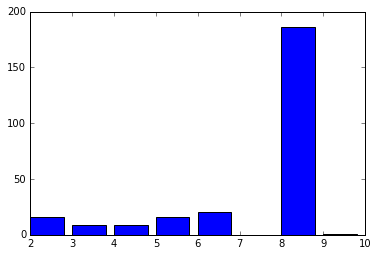

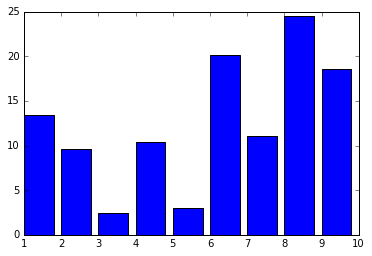

In [8]:
area_by_y = forest_fires.pivot_table(index="Y", values="area", aggfunc=np.mean)
area_by_x = forest_fires.pivot_table(index="X", values="area", aggfunc=np.mean)

plt.bar(area_by_y.index, area_by_y)
plt.show()
plt.bar(area_by_x.index, area_by_x)
plt.show()

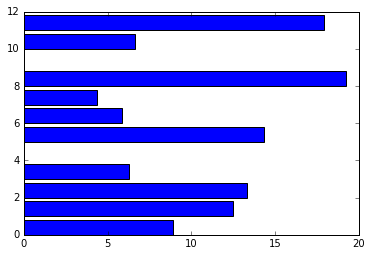

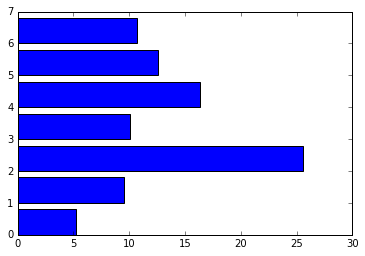

In [10]:
area_by_month = forest_fires.pivot_table(index="month", values="area", aggfunc=np.mean)
area_by_day = forest_fires.pivot_table(index="day", values="area", aggfunc=np.mean)

plt.barh(range(len(area_by_month)), area_by_month)
plt.show()
plt.barh(range(len(area_by_day)), area_by_day)
plt.show()

### Labeling

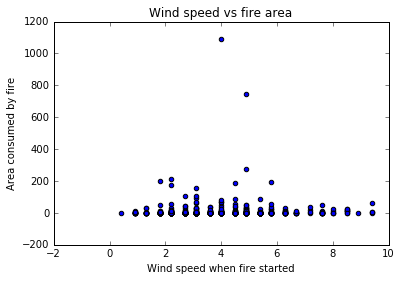

In [11]:
wind = forest_fires['wind']
area = forest_fires['area']
temp = forest_fires['temp']

plt.scatter(wind,area)
plt.title('Wind speed vs fire area')
plt.xlabel('Wind speed when fire started')
plt.ylabel('Area consumed by fire')
plt.show()

### Aesthetics

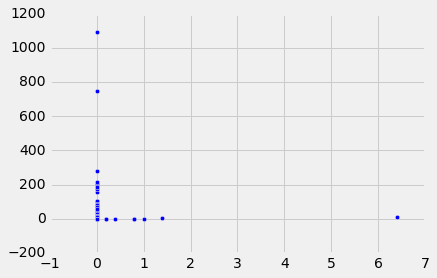

In [13]:
rain = forest_fires['rain']
area = forest_fires['area']

plt.style.use('fivethirtyeight')
plt.scatter(rain, area)
plt.show()

## Exploring Data

In [14]:
recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.columns)
recent_grads.head(2)

Index([u'Rank', u'Major_code', u'Major', u'Major_category', u'Total',
       u'Sample_size', u'Men', u'Women', u'ShareWomen', u'Employed',
       u'Full_time', u'Part_time', u'Full_time_year_round', u'Unemployed',
       u'Unemployment_rate', u'Median', u'P25th', u'P75th', u'College_jobs',
       u'Non_college_jobs', u'Low_wage_jobs'],
      dtype='object')


,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176bef90>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x11d590d50>]], dtype=object)

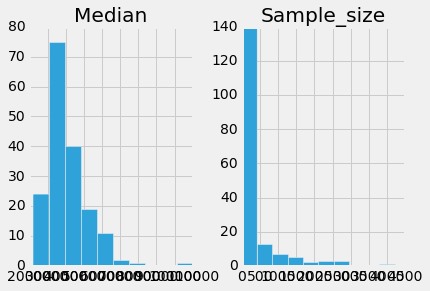

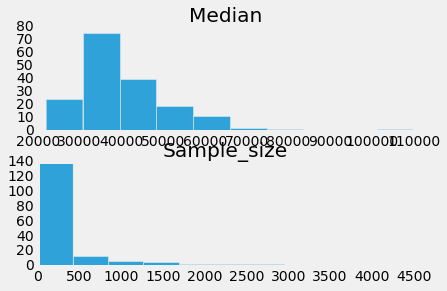

In [17]:
columns = ['Median','Sample_size']
recent_grads.hist(column=columns)
recent_grads.hist(column=columns, layout=(2,1), grid=False)

### Box Plots

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

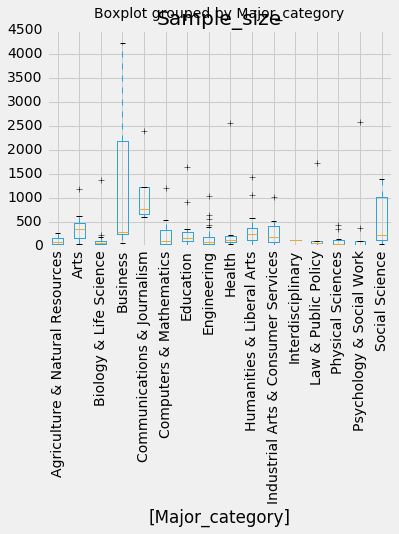

In [19]:
sample_size = recent_grads[['Sample_size', 'Major_category']]

# Run the `boxplot()` function on `sample_size` DataFrame and specify, as a parameter, 
# that we'd like a box and whisker diagram to be generated for each unique `Major_category`
sample_size.boxplot(by='Major_category')

# Format the resulting plot to make the x-axis labels (each `Major_category` value) 
# appear vertically instead of horizontally (by rotating 90 degrees)
plt.xticks(rotation=90)

### Multiple plots in one chart

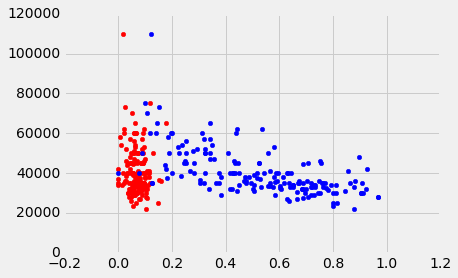

In [20]:
# Plot Unemployment_rate on x-axis, Median salary on y-axis, in red
plt.scatter(recent_grads['Unemployment_rate'], recent_grads['Median'], color='red')
# Plot ShareWomen (Female % in major) on x-axis, Median salary on y-axis, in blue
plt.scatter(recent_grads['ShareWomen'], recent_grads['Median'], color='blue')
plt.show()